In [1]:
from IPython.display import Image
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# inline plotting instead of popping out
%matplotlib inline

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from lib import *

In [2]:
import pandas as pd
df=pd.read_csv('default of credit card clients.csv')

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df= df.drop('Unnamed: 0', 1)[1:]

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
X = df.drop('Y', 1)
y = df['Y']

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=500, 
                                random_state=22,
                                n_jobs=2)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

 1) X6                             0.078006
 2) X5                             0.067428
 3) X12                            0.063315
 4) X1                             0.063053
 5) X13                            0.056751
 6) X14                            0.053705
 7) X18                            0.053553
 8) X15                            0.052395
 9) X16                            0.052327
10) X17                            0.052057
11) X19                            0.051588
12) X20                            0.049392
13) X23                            0.047927
14) X21                            0.046915
15) X22                            0.045859
16) X7                             0.039320
17) X8                             0.025365
18) X3                             0.020810
19) X9                             0.018523
20) X10                            0.018108
21) X11                            0.017600
22) X4                             0.013682
23) X2                          

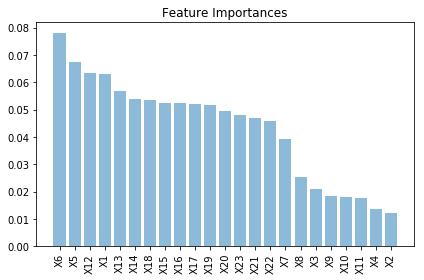

In [10]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()

plt.show()

In [11]:
X = X.drop('X2', 1).drop('X4', 1).drop('X11', 1).drop('X10', 1).drop('X9', 1).drop('X3', 1).drop('X8', 1).drop('X7', 1).drop('X22', 1).drop('X21', 1).drop('X23', 1).drop('X20', 1).drop('X19', 1).drop('X17', 1).drop('X16', 1).drop('X15', 1).drop('X18', 1).drop('X14', 1)
X.head()

,X1,X5,X6,X12,X13
1,20000,24,2,3913,3102
2,120000,26,-1,2682,1725
3,90000,34,0,29239,14027
4,50000,37,0,46990,48233
5,50000,57,-1,8617,5670


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


In [13]:
from sklearn.svm import SVC

# kernel: the kernel function, can be 'linear', 'poly', 'rbf', ...etc
# C is the hyperparameter for the error penalty term
svm_linear = SVC(kernel='linear', C=5.0, random_state=0)

svm_linear.fit(X_train_std, y_train)
y_pred = svm_linear.predict(X_test_std)
print('[Linear SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# C is the hyperparameter for the error penalty term
# gamma is the hyperparameter for the rbf kernel
svm_rbf = SVC(kernel='rbf', random_state=0, gamma=0.2, C=5.0)

svm_rbf.fit(X_train_std, y_train)
y_pred = svm_rbf.predict(X_test_std)
print('[Nonlinear SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


[Linear SVC]
Misclassified samples: 1274
Accuracy: 0.79
[Nonlinear SVC]
Misclassified samples: 1042
Accuracy: 0.83


In [14]:
print('[Nonlinear SVC: C=0.1, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=0.1)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=1.0, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=100, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=100.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


[Nonlinear SVC: C=0.1, gamma=0.01]
Misclassified samples: 1262
Accuracy: 0.79

[Nonlinear SVC: C=1.0, gamma=0.01]
Misclassified samples: 1030
Accuracy: 0.83

[Nonlinear SVC: C=10, gamma=0.01]
Misclassified samples: 1030
Accuracy: 0.83

[Nonlinear SVC: C=100, gamma=0.01]
Misclassified samples: 1034
Accuracy: 0.83


In [15]:
print('[Nonlinear SVC: C=10, gamma=0.00001]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.00001, C=0.1)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.0001]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.0001, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.001]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.001, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.1]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=1.0]')
svm = SVC(kernel='rbf', random_state=0, gamma=1.0, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Nonlinear SVC: C=10, gamma=0.00001]
Misclassified samples: 1274
Accuracy: 0.79

[Nonlinear SVC: C=10, gamma=0.0001]
Misclassified samples: 1274
Accuracy: 0.79

[Nonlinear SVC: C=10, gamma=0.001]
Misclassified samples: 1237
Accuracy: 0.79

[Nonlinear SVC: C=10, gamma=0.01]
Misclassified samples: 1030
Accuracy: 0.83

[Nonlinear SVC: C=10, gamma=0.1]
Misclassified samples: 1039
Accuracy: 0.83

[Nonlinear SVC: C=10, gamma=1.0]
Misclassified samples: 1046
Accuracy: 0.83


In [16]:
from sklearn.model_selection import GridSearchCV

param_C = [0.1, 1.0, 10.0, 100]
param_gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

svm = SVC(random_state=22)

# set the param_grid parameter of GridSearchCV to a list of dictionaries
param_grid = [{'C': param_C, 
               'gamma': param_gamma, 
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8174583333333333
{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [17]:
clf = gs.best_estimator_
clf.fit(X_train_std, y_train)
print('\n[Nonlinear SVC: grid search]')
print('Test accuracy: %.2f' % clf.score(X_test_std, y_test))


[Nonlinear SVC: grid search]
Test accuracy: 0.83


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#grid.fit(X_train,y_train)
grid_predictions = clf.predict(X_train_std)
print(confusion_matrix(y_train,grid_predictions))
print(classification_report(y_train,grid_predictions))

[[17890   748]
 [ 3616  1746]]
             precision    recall  f1-score   support

          0       0.83      0.96      0.89     18638
          1       0.70      0.33      0.44      5362

avg / total       0.80      0.82      0.79     24000

